# K-Means Clustering Example

Let's make some fake data that includes people clustered by income and age, randomly:

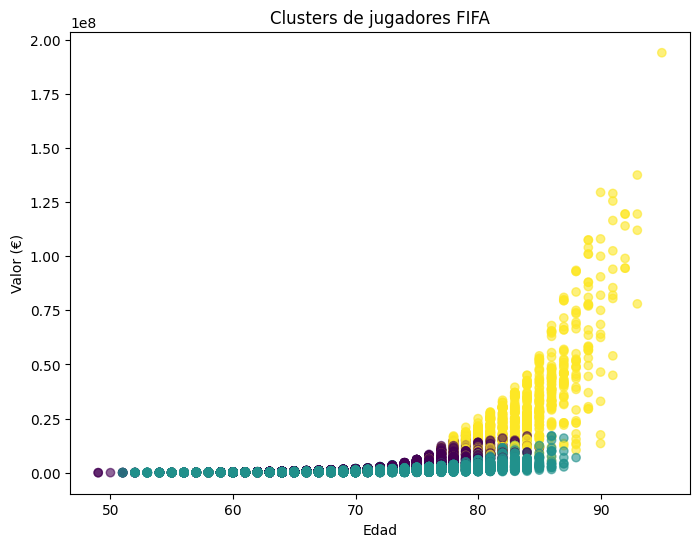

           overall  potential      wage_eur     value_eur        age
cluster                                                             
0        68.474711  69.512862   8526.793111  1.900651e+06  28.930892
1        61.367493  71.348962   2916.220138  1.110688e+06  21.237665
2        79.745402  82.665053  66363.020329  2.637251e+07  26.242014


,short_name,overall,potential,value_eur,wage_eur,age,cluster
sofifa_id,,,,,,,
158023,L. Messi,93,93,78000000.0,320000.0,34,2
188545,R. Lewandowski,92,92,119500000.0,270000.0,32,2
20801,Cristiano Ronaldo,91,91,45000000.0,270000.0,36,2
190871,Neymar Jr,91,91,129000000.0,270000.0,29,2
192985,K. De Bruyne,91,91,125500000.0,350000.0,30,2


In [7]:
from numpy import random, array, mean
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random

usecols = ["sofifa_id", "short_name","overall", "potential", "wage_eur", "value_eur", "age"]
#
# Read data with subset of columns
players = pd.read_csv("data/players_22.csv", index_col= "sofifa_id", usecols=usecols)
players = players.dropna()
'''
len_players = len(players)
media = np.mean(players["value_eur"])
varianza = np.var(players["value_eur"])
varianza_muestral = np.var(players["value_eur"], ddof=1)
print(f"media:{media}, varianza:{varianza}, varianza muestral:{varianza_muestral} ")
'''
features = players[["overall", "potential", "wage_eur", "value_eur", "age"]]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

players["cluster"] = kmeans.labels_
plt.figure(figsize=(8,6))
plt.scatter(players["potential"], players["value_eur"], c=players["cluster"], cmap='viridis', alpha=0.6)
plt.xlabel("Edad")
plt.ylabel("Valor (€)")
plt.title("Clusters de jugadores FIFA")
plt.show()
cluster_summary = players.groupby("cluster")[["overall", "potential", "wage_eur", "value_eur", "age"]].mean()
print(cluster_summary)



players.head(5)

We'll use k-means to rediscover these clusters in unsupervised learning:

## Activity

Things to play with: what happens if you don't scale the data? What happens if you choose different values of K? In the real world, you won't know the "right" value of K to start with - you'll need to converge on it yourself.